# Analysis of WSe2 102

First we start by cleaning up the .csv files. To do that, we get rid of any rows that don't contain data of intrest, store data into vectors, and then plot the curves. Afterwards, we extract the mobility and contact resistance from the measurements.

In [1]:
import numpy as np
from numpy import exp, pi, sqrt
import matplotlib.pyplot as plt
from csv import reader

In [2]:
def file_extractor(file):
    # Declare filepaths
    IdVd_file = open(file)

    # Read files
    IdVd_read = reader(IdVd_file)

    # Convert to list
    IdVd_data = list(IdVd_read)
    IdVd_data_clean = IdVd_data[259:]
    
    return IdVd_data_clean

def data_extractor(data):
    V_list = [] # [Vd, Vg, Vs]
    I_list = [] # [Id, Ig, Is]
    for row in data[1:]:
        # Extract values for voltages
        Vd = float(row[1])
        Vg = float(row[2])
        Vs = float(row[3])
        V = [Vd,Vg,Vs]
        V_list.append(V)
        # Extract values for currents
        Id = float(row[4])
        Ig = float(row[5])
        Is = float(row[6])
        I = [Id, Ig, Is]
        I_list.append(I)
    
    V_array = np.array(V_list)
    I_array = np.array(I_list)
    return V_array, I_array

def range_extractor(V_array):
    # Create vectors for Vd, Vg, and Vs
    #  Loop through data_array and determine the values of Vg
    Vg_values = [V_array[0,1]]
    idx = 0
    for i in range(len(V_array[:,1])):
        value = V_array[i,1]
        if Vg_values[idx] != value:
            Vg_values.append(value)
            idx += 1
            
    #  Index Vd, Vg, Vs arrays using boolean to extract values corresponding to Vg = -5
    Vgrange1 = Vg == -5
    Vgrange2 = Vg == -10
    #  First range of values
    Vd1 = V_array[Vgrange1,0]
    Vg1 = V_array[Vgrange1,1]
    Vs1 = V_array[Vgrange1,2]
    #  Second range of values
    Vd2 = V_array[Vgrange2,0]
    Vg2 = V_array[Vgrange2,1]
    Vs2 = V_array[Vgrange2,2]

In [12]:
IdVd200nm = 'Id-Vd_pFET_200nm-2(8).csv'
IdVd200nm_2 = 'Id-Vd_pFET [.2um-2(9) ; 10_23_2019 9_28_00 AM].csv'
IdVd300nm = 'Id-Vd_pFET [.3um-1(7) ; 10_23_2019 9_18_34 AM].csv'

# Extract the data from files
IdVd_data_200nm = file_extractor(IdVd200nm)
IdVd_data_200nm_2 = file_extractor(IdVd200nm_2)
IdVd_data_300nm = file_extractor(IdVd300nm)

# Extract V and I data from rows
V_array_200nm, I_array_200nm = data_extractor(IdVd_data_200nm)
V_array_200nm_2, I_array_200nm_2 = data_extractor(IdVd_data_200nm_2)
V_array_300nm, I_array_300nm = data_extractor(IdVd_data_300nm)

In [4]:
# Create vectors for Vd, Vg, and Vs
#  Index Vd, Vg, Vs arrays using boolean to extract values corresponding to Vg = -5
Vgrange1 = V_array_200nm[:,1] == -5
Vgrange2 = V_array_200nm[:,1] == -10
Vgrange3 = V_array_200nm[:,1] == -15
Vgrange4 = V_array_200nm[:,1] == -20
Vgrange5 = V_array_200nm[:,1] == -25
Vgrange6 = V_array_200nm[:,1] == -30
Vgrange7 = V_array_200nm[:,1] == -35
Vgrange8 = V_array_200nm[:,1] == -40

#  First range of values
Vd1 = V_array_200nm[Vgrange1,0]
Vg1 = V_array_200nm[Vgrange1,1]
Vs1 = V_array_200nm[Vgrange1,2]

#  Second range of values
Vd2 = V_array_200nm[Vgrange2,0]
Vg2 = V_array_200nm[Vgrange2,1]
Vs2 = V_array_200nm[Vgrange2,2]

#  Third range of values
Vd3 = V_array_200nm[Vgrange3,0]
Vg3 = V_array_200nm[Vgrange3,1]
Vs3 = V_array_200nm[Vgrange3,2]

# Create vectors for Id, Ig, and Is
#  Index Id array using boolean to extract values corresponding to Vg = -5
Igrange1 = Vgrange1
Igrange2 = Vgrange2
Igrange3 = Vgrange3
Igrange4 = Vgrange4
Igrange5 = Vgrange5
Igrange6 = Vgrange6
Igrange7 = Vgrange7
Igrange8 = Vgrange8

#  First range of values
Id1 = I_array_200nm[Igrange1,0]
Ig1 = I_array_200nm[Igrange1,1]
Is1 = I_array_200nm[Igrange1,2]
#  Second range of values
Id2 = I_array_200nm[Igrange2,0]
Ig2 = I_array_200nm[Igrange2,1]
Is2 = I_array_200nm[Igrange2,2]
#  Second range of values
Id3 = I_array_200nm[Igrange3,0]
Ig3 = I_array_200nm[Igrange3,1]
Is3 = I_array_200nm[Igrange3,2]
#  Second range of values
Id4 = I_array_200nm[Igrange4,0]
Ig4 = I_array_200nm[Igrange4,1]
Is4 = I_array_200nm[Igrange4,2]
#  Second range of values
Id5 = I_array_200nm[Igrange5,0]
Ig5 = I_array_200nm[Igrange5,1]
Is5 = I_array_200nm[Igrange5,2]
#  Second range of values
Id6 = I_array_200nm[Igrange6,0]
Ig6 = I_array_200nm[Igrange6,1]
Is6 = I_array_200nm[Igrange6,2]
#  Second range of values
Id7 = I_array_200nm[Igrange7,0]
Ig7 = I_array_200nm[Igrange7,1]
Is7 = I_array_200nm[Igrange7,2]
#  Second range of values
Id8 = I_array_200nm[Igrange8,0]
Ig8 = I_array_200nm[Igrange8,1]
Is8 = I_array_200nm[Igrange8,2]

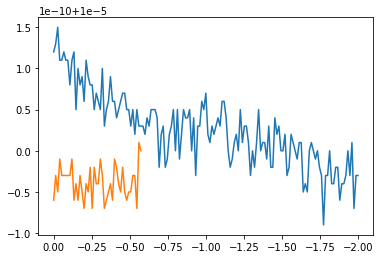

In [5]:
fig, ax = plt.subplots()
ax.plot(Vd1, Id1)
ax.plot(Vd2, Id2)
ax.plot(Vd3, Id3)
ax.axes.invert_xaxis()

In [6]:
# Create vectors for Vd, Vg, and Vs
#  Index Vd, Vg, Vs arrays using boolean to extract values corresponding to Vg = -5
Vgrange1 = V_array_200nm_2[:,1] == -5
Vgrange2 = V_array_200nm_2[:,1] == -10
Vgrange3 = V_array_200nm_2[:,1] == -15
Vgrange4 = V_array_200nm_2[:,1] == -20
Vgrange5 = V_array_200nm_2[:,1] == -25
Vgrange6 = V_array_200nm_2[:,1] == -30
Vgrange7 = V_array_200nm_2[:,1] == -35
Vgrange8 = V_array_200nm_2[:,1] == -40

#  First range of values
Vd1 = V_array_200nm_2[Vgrange1,0]
Vg1 = V_array_200nm_2[Vgrange1,1]
Vs1 = V_array_200nm_2[Vgrange1,2]

#  Second range of values
Vd2 = V_array_200nm_2[Vgrange2,0]
Vg2 = V_array_200nm_2[Vgrange2,1]
Vs2 = V_array_200nm_2[Vgrange2,2]

#  Third range of values
Vd3 = V_array_200nm_2[Vgrange3,0]
Vg3 = V_array_200nm_2[Vgrange3,1]
Vs3 = V_array_200nm_2[Vgrange3,2]

#  Fourth range of values
Vd4 = V_array_200nm_2[Vgrange4,0]
Vg4 = V_array_200nm_2[Vgrange4,1]
Vs4 = V_array_200nm_2[Vgrange4,2]

#  Fifth range of values
Vd5 = V_array_200nm_2[Vgrange5,0]
Vg5 = V_array_200nm_2[Vgrange5,1]
Vs5 = V_array_200nm_2[Vgrange5,2]

#  Sixth range of values
Vd6 = V_array_200nm_2[Vgrange6,0]
Vg6 = V_array_200nm_2[Vgrange6,1]
Vs6 = V_array_200nm_2[Vgrange6,2]

#  Seventh range of values
Vd7 = V_array_200nm_2[Vgrange7,0]
Vg7 = V_array_200nm_2[Vgrange7,1]
Vs7 = V_array_200nm_2[Vgrange7,2]

#  Eighth range of values
Vd8 = V_array_200nm_2[Vgrange8,0]
Vg8 = V_array_200nm_2[Vgrange8,1]
Vs8 = V_array_200nm_2[Vgrange8,2]

# Create vectors for Id, Ig, and Is
#  Index Id array using boolean to extract values corresponding to Vg = -5
Igrange1 = Vgrange1
Igrange2 = Vgrange2
Igrange3 = Vgrange3
Igrange4 = Vgrange4
Igrange5 = Vgrange5
Igrange6 = Vgrange6
Igrange7 = Vgrange7
Igrange8 = Vgrange8

#  First range of values
Id1 = I_array_200nm_2[Igrange1,0]
Ig1 = I_array_200nm_2[Igrange1,1]
Is1 = I_array_200nm_2[Igrange1,2]
#  Second range of values
Id2 = I_array_200nm_2[Igrange2,0]
Ig2 = I_array_200nm_2[Igrange2,1]
Is2 = I_array_200nm_2[Igrange2,2]
#  Second range of values
Id3 = I_array_200nm_2[Igrange3,0]
Ig3 = I_array_200nm_2[Igrange3,1]
Is3 = I_array_200nm_2[Igrange3,2]
#  Second range of values
Id4 = I_array_200nm_2[Igrange4,0]
Ig4 = I_array_200nm_2[Igrange4,1]
Is4 = I_array_200nm_2[Igrange4,2]
#  Second range of values
Id5 = I_array_200nm_2[Igrange5,0]
Ig5 = I_array_200nm_2[Igrange5,1]
Is5 = I_array_200nm_2[Igrange5,2]
#  Second range of values
Id6 = I_array_200nm_2[Igrange6,0]
Ig6 = I_array_200nm_2[Igrange6,1]
Is6 = I_array_200nm_2[Igrange6,2]
#  Second range of values
Id7 = I_array_200nm_2[Igrange7,0]
Ig7 = I_array_200nm_2[Igrange7,1]
Is7 = I_array_200nm_2[Igrange7,2]
#  Second range of values
Id8 = I_array_200nm_2[Igrange8,0]
Ig8 = I_array_200nm_2[Igrange8,1]
Is8 = I_array_200nm_2[Igrange8,2]

In [10]:
I_array_200nm_2[Igrange4,0]

array([], dtype=float64)

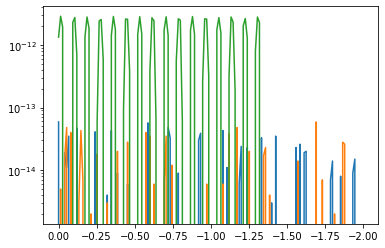

In [8]:
fig2, ax2 = plt.subplots()
ax2.plot(Vd1, Id1)
ax2.plot(Vd2, Id2)
ax2.plot(Vd3, Is3)
ax2.plot(Vd4, Id4)
ax2.plot(Vd5, Id5)
ax2.plot(Vd6, Id6)
ax2.plot(Vd7, Id7)
ax2.axes.invert_xaxis()
ax2.set_yscale('log')

In [14]:
# Create vectors for Vd, Vg, and Vs
#  Index Vd, Vg, Vs arrays using boolean to extract values corresponding to Vg = -5
Vgrange1 = V_array_300nm[:,1] == -5
Vgrange2 = V_array_300nm[:,1] == -10
Vgrange3 = V_array_300nm[:,1] == -15
Vgrange4 = V_array_300nm[:,1] == -20
Vgrange5 = V_array_300nm[:,1] == -25
Vgrange6 = V_array_300nm[:,1] == -30
Vgrange7 = V_array_300nm[:,1] == -35
Vgrange8 = V_array_300nm[:,1] == -40

#  First range of values
Vd1 = V_array_300nm[Vgrange1,0]
Vg1 = V_array_300nm[Vgrange1,1]
Vs1 = V_array_300nm[Vgrange1,2]

#  Second range of values
Vd2 = V_array_300nm[Vgrange2,0]
Vg2 = V_array_300nm[Vgrange2,1]
Vs2 = V_array_300nm[Vgrange2,2]

#  Third range of values
Vd3 = V_array_300nm[Vgrange3,0]
Vg3 = V_array_300nm[Vgrange3,1]
Vs3 = V_array_300nm[Vgrange3,2]

#  Fourth range of values
Vd4 = V_array_300nm[Vgrange4,0]
Vg4 = V_array_300nm[Vgrange4,1]
Vs4 = V_array_300nm[Vgrange4,2]

#  Fifth range of values
Vd5 = V_array_300nm[Vgrange5,0]
Vg5 = V_array_300nm[Vgrange5,1]
Vs5 = V_array_300nm[Vgrange5,2]

#  Sixth range of values
Vd6 = V_array_300nm[Vgrange6,0]
Vg6 = V_array_300nm[Vgrange6,1]
Vs6 = V_array_300nm[Vgrange6,2]

#  Seventh range of values
Vd7 = V_array_300nm[Vgrange7,0]
Vg7 = V_array_300nm[Vgrange7,1]
Vs7 = V_array_300nm[Vgrange7,2]

#  Eighth range of values
Vd8 = V_array_300nm[Vgrange8,0]
Vg8 = V_array_300nm[Vgrange8,1]
Vs8 = V_array_300nm[Vgrange8,2]

# Create vectors for Id, Ig, and Is
#  Index Id array using boolean to extract values corresponding to Vg = -5
Igrange1 = Vgrange1
Igrange2 = Vgrange2
Igrange3 = Vgrange3
Igrange4 = Vgrange4
Igrange5 = Vgrange5
Igrange6 = Vgrange6
Igrange7 = Vgrange7
Igrange8 = Vgrange8

#  First range of values
Id1 = I_array_300nm[Igrange1,0]
Ig1 = I_array_300nm[Igrange1,1]
Is1 = I_array_300nm[Igrange1,2]
#  Second range of values
Id2 = I_array_300nm[Igrange2,0]
Ig2 = I_array_300nm[Igrange2,1]
Is2 = I_array_300nm[Igrange2,2]
#  Second range of values
Id3 = I_array_300nm[Igrange3,0]
Ig3 = I_array_300nm[Igrange3,1]
Is3 = I_array_300nm[Igrange3,2]
#  Second range of values
Id4 = I_array_300nm[Igrange4,0]
Ig4 = I_array_300nm[Igrange4,1]
Is4 = I_array_300nm[Igrange4,2]
#  Second range of values
Id5 = I_array_300nm[Igrange5,0]
Ig5 = I_array_300nm[Igrange5,1]
Is5 = I_array_300nm[Igrange5,2]
#  Second range of values
Id6 = I_array_300nm[Igrange6,0]
Ig6 = I_array_300nm[Igrange6,1]
Is6 = I_array_300nm[Igrange6,2]
#  Second range of values
Id7 = I_array_300nm[Igrange7,0]
Ig7 = I_array_300nm[Igrange7,1]
Is7 = I_array_300nm[Igrange7,2]
#  Second range of values
Id8 = I_array_300nm[Igrange8,0]
Ig8 = I_array_300nm[Igrange8,1]
Is8 = I_array_300nm[Igrange8,2]

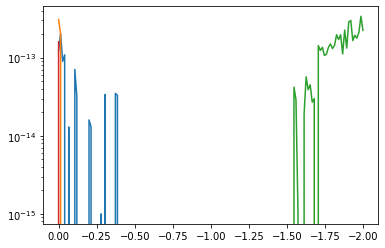

In [20]:
fig3, ax3 = plt.subplots()
ax3.plot(Vd1, Id1)
ax3.plot(Vd2, Id2)
ax3.plot(Vd3, Is3)
ax3.plot(Vd4, Id4)
#ax3.plot(Vd5, Id5)
#ax3.plot(Vd6, Id6)
#ax3.plot(Vd7, Id7)
ax3.axes.invert_xaxis()
ax3.set_yscale('log')

array([ 0.    , -0.0133, -0.0267, -0.04  , -0.0533, -0.0667, -0.08  ,
       -0.0933, -0.1067, -0.12  , -0.1333, -0.1467, -0.16  , -0.1733,
       -0.1867, -0.2   , -0.2133, -0.2267, -0.24  , -0.2533, -0.2667,
       -0.28  , -0.2933, -0.3067, -0.32  , -0.3333, -0.3467, -0.36  ,
       -0.3733, -0.3867, -0.4   , -0.4133, -0.4267, -0.44  , -0.4533,
       -0.4667, -0.48  , -0.4933, -0.5067, -0.52  , -0.5333, -0.5467,
       -0.56  , -0.5733, -0.5867, -0.6   , -0.6133, -0.6267, -0.64  ,
       -0.6533, -0.6667, -0.68  , -0.6933, -0.7067, -0.72  , -0.7333,
       -0.7467, -0.76  , -0.7733, -0.7867, -0.8   , -0.8133, -0.8267,
       -0.84  , -0.8533, -0.8667, -0.88  , -0.8933, -0.9067, -0.92  ,
       -0.9333, -0.9467, -0.96  , -0.9733, -0.9867, -1.    , -1.0133,
       -1.0267, -1.04  , -1.0533, -1.0667, -1.08  , -1.0933, -1.1067,
       -1.12  , -1.1333, -1.1467, -1.16  , -1.1733, -1.1867, -1.2   ,
       -1.2133, -1.2267, -1.24  , -1.2533, -1.2667, -1.28  , -1.2933,
       -1.3067, -1.3